In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.rcParams['figure.figsize'] = [17, 10]

In [269]:
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [270]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [271]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


<AxesSubplot: >

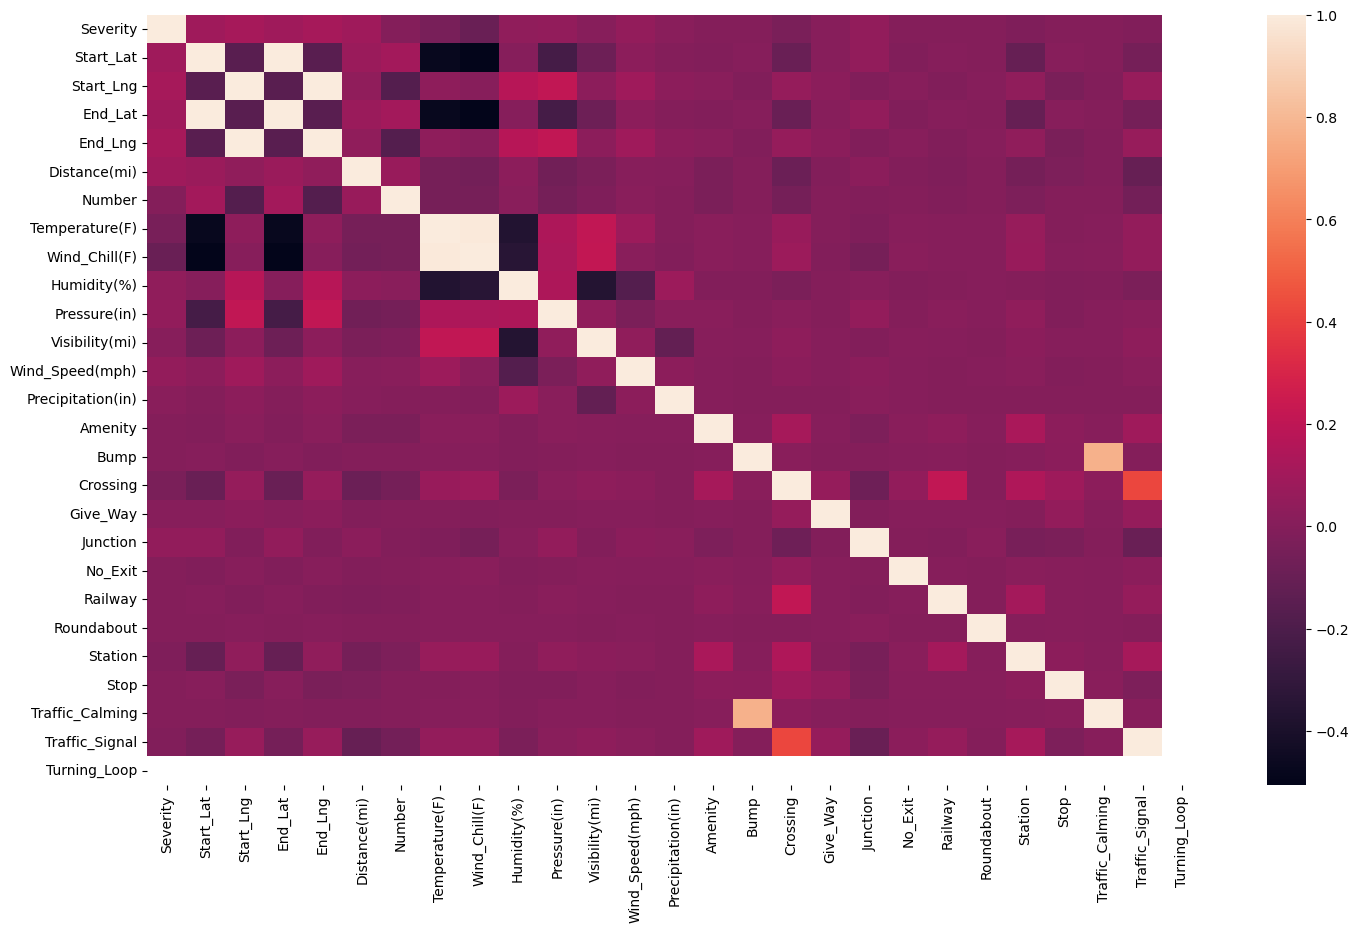

In [272]:
sns.heatmap(df.corr(numeric_only=True))

### I think a fun experiment with this dataset would be predicting the end time of the accident.
#### The utility this would provide would be allowing for accident information on route planning in the near future.
#### When planning trips to different cities/states, it can be helpful to preview an hour or so before leaving with a specified departure time and see a forecast of accident information.

In [273]:
a = df["Start_Time"][0]
b = df["End_Time"][0]
print(a)
print(b)

2016-02-08 00:37:08
2016-02-08 06:37:08


In [274]:
format_t = "%Y-%m-%d %H:%M:%S"

In [275]:
a_dt = datetime.strptime(a, format_t)
b_dt = datetime.strptime(b, format_t)

In [276]:
time_diff = b_dt - a_dt

In [277]:
time_diff.total_seconds() / 60

360.0

In [278]:
def to_datetime(row):
    '''
    account for diff length/spots after decimal :)
    2016-02-08 00:37:08
    2021-11-11 19:36:30.000000000
    2021-10-23 15:50:00.000000
    '''
    format_t = "%Y-%m-%d %H:%M:%S"

    if len(row["Start_Time"]) == 19:
        dt = datetime.strptime(row["Start_Time"], format_t)
    
    elif len(row["Start_Time"]) == 26:
        dt = datetime.strptime(row["Start_Time"][:-7], format_t)
    
    elif len(row["Start_Time"]) == 29:
        dt = datetime.strptime(row["Start_Time"][:-10], format_t)
    
    return dt

In [279]:
def time_diff(row):
    '''
    account for diff length/spots after decimal :)
    2016-02-08 00:37:08
    2021-11-11 19:36:30.000000000
    2021-10-23 15:50:00.000000
    '''
    format_t = "%Y-%m-%d %H:%M:%S"
    
    if len(row["End_Time"]) == 19:
        diff = (datetime.strptime(row["End_Time"], format_t) - datetime.strptime(row["Start_Time"], format_t))
    
    elif len(row["End_Time"]) == 26:
        diff = (datetime.strptime(row["End_Time"][:-7], format_t) - datetime.strptime(row["Start_Time"][:-7], format_t))
    
    elif len(row["End_Time"]) == 29:
        diff = (datetime.strptime(row["End_Time"][:-10], format_t) - datetime.strptime(row["Start_Time"][:-10], format_t))

    diff = diff.total_seconds() / 60
    
    return diff


In [280]:
df["duration(min)"] = df.apply(lambda row: time_diff(row), axis=1)

In [281]:
df["duration(min)"].describe()

count    2.845342e+06
mean     3.590335e+02
std      9.329918e+03
min      2.000000e+00
25%      7.398333e+01
50%      1.200000e+02
75%      2.236833e+02
max      1.682579e+06
Name: duration(min), dtype: float64

In [282]:
#we have a lot of values that are longer than a month, some that are not severity 4
#dropping columns that are over a certain threshold (starting with 3 days)
duration_threshold = 4320 # mins in 3 days
df = df[df["duration(min)"] < duration_threshold]

In [283]:
df["duration(min)"].describe()

count    2.841336e+06
mean     1.759215e+02
std      2.098375e+02
min      2.000000e+00
25%      7.378333e+01
50%      1.200000e+02
75%      2.220000e+02
max      4.319983e+03
Name: duration(min), dtype: float64

(array([1.108021e+06, 8.861110e+05, 2.495650e+05, 6.442600e+04,
        3.936900e+05, 2.634600e+04, 2.012000e+04, 1.886300e+04,
        1.986300e+04, 1.804500e+04, 9.621000e+03, 3.998000e+03,
        2.114000e+03, 1.366000e+03, 1.144000e+03, 1.331000e+03,
        1.462000e+03, 7.416000e+03, 2.281000e+03, 8.490000e+02,
        3.130000e+02, 2.220000e+02, 3.060000e+02, 2.690000e+02,
        4.160000e+02, 3.730000e+02, 3.640000e+02, 3.410000e+02,
        2.010000e+02, 1.760000e+02, 1.140000e+02, 5.600000e+01,
        4.700000e+01, 1.180000e+02, 1.320000e+02, 5.900000e+01,
        8.400000e+01, 5.100000e+01, 6.800000e+01, 1.020000e+02,
        1.140000e+02, 1.200000e+02, 1.480000e+02, 1.540000e+02,
        1.070000e+02, 7.600000e+01, 5.400000e+01, 4.300000e+01,
        3.200000e+01, 4.400000e+01]),
 array([2.00000000e+00, 8.83596667e+01, 1.74719333e+02, 2.61079000e+02,
        3.47438667e+02, 4.33798333e+02, 5.20158000e+02, 6.06517667e+02,
        6.92877333e+02, 7.79237000e+02, 8.65596667

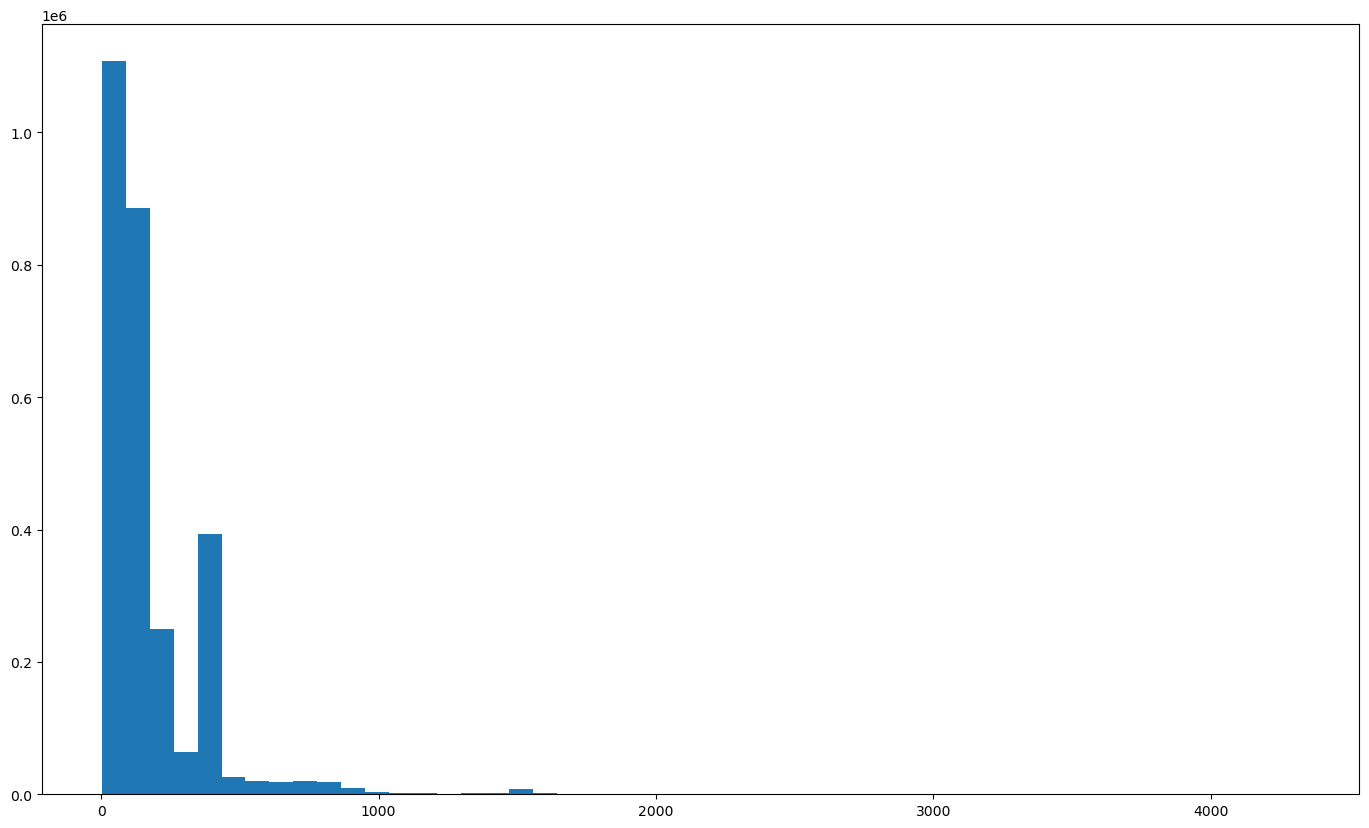

In [284]:
plt.hist(df["duration(min)"], bins=50)

In [285]:
#what features to consider for prediction?
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'duration(min)'],
      dtype='object')

In [286]:
#county, state have 0 null, so we can use that instead of zipcode to preserve more data
#or we can drop 1317 datapoints
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1741582
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1317
Country                        0
Timezone                    3654
Airport_Code                9544
Weather_Timestamp          50688
Temperature(F)             69146
Wind_Chill(F)             469060
Humidity(%)                72961
Pressure(in)               59137
Visibility(mi)             70396
Wind_Direction             73620
Wind_Speed(mph)           157685
Precipitation(in)         548893
Weather_Condition          70501
Amenity   

In [288]:
features = ["Severity", "Time_of_Incident", "Temperature(F)", "Visibility(mi)",
"Precipitation(in)", "Weather_Condition", "Junction", "Stop", "Traffic_Signal",
"Sunrise_Sunset", "Zipcode", "duration(min)"]

#val_to_predict = "duration(min)"

In [289]:
#y = df[val_to_predict]
df = df[features]
df.columns

Index(['Severity', 'Time_of_Incident', 'Temperature(F)', 'Visibility(mi)',
       'Precipitation(in)', 'Weather_Condition', 'Junction', 'Stop',
       'Traffic_Signal', 'Sunrise_Sunset', 'Zipcode', 'duration(min)'],
      dtype='object')

In [287]:
#to prep the start time column to use as a feature,
#I need to create categorical columns based on the info (hour of the day, day of the week, month of the year)

df["Time_of_Incident"] = df.apply(lambda row: to_datetime(row), axis=1)

In [ ]:
df["Time_of_Incident"]

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Time_of_Incident, Length: 2841336, dtype: datetime64[ns]

In [290]:
df.head(5)

,Severity,Time_of_Incident,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Junction,Stop,Traffic_Signal,Sunrise_Sunset,Zipcode,duration(min)
0,3,2016-02-08 00:37:08,42.1,10.0,0.00,Light Rain,False,False,False,Night,43017,360.0
1,2,2016-02-08 05:56:20,36.9,10.0,0.02,Light Rain,False,False,False,Night,45424,360.0
2,2,2016-02-08 06:15:39,36.0,10.0,0.02,Overcast,True,False,False,Night,45203,360.0
3,2,2016-02-08 06:51:45,39.0,10.0,NaN,Overcast,False,False,False,Night,44311,360.0
4,3,2016-02-08 07:53:43,37.0,10.0,0.01,Light Rain,False,False,False,Day,45217,360.0


In [ ]:
tmp = df["Time_of_Incident"].iloc[0]
tmp.day_name()
tmp.hour

0

In [291]:
#create column of day of week to get dummies for
df["Day"] = df.apply(lambda row: row.Time_of_Incident.day_name(), axis=1)

In [292]:
#same for hour of the day
df["Hour"] = df.apply(lambda row: row.Time_of_Incident.hour, axis=1)

(array([183194., 100121., 191068., 374306., 216907., 309728., 623609.,
        389045., 211278., 242080.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

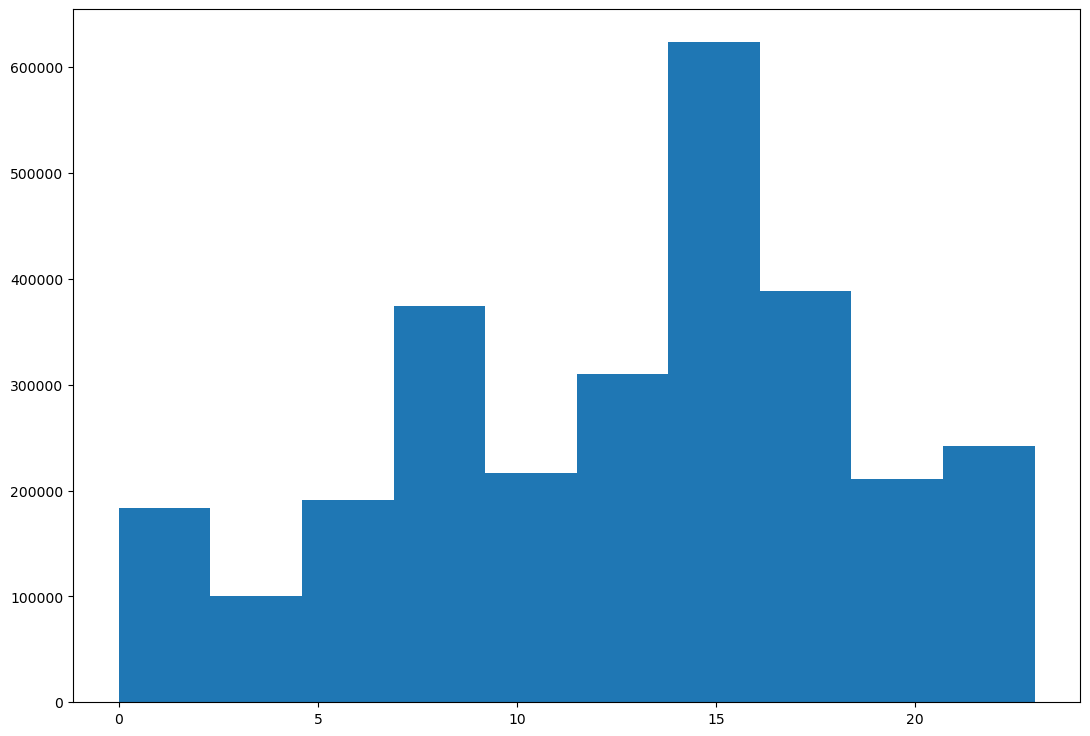

In [103]:
plt.hist(df.Hour)

In [ ]:
df.head()

,Severity,Time_of_Incident,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Junction,Stop,Traffic_Signal,Sunrise_Sunset,Zipcode,Day,Hour
0,3,2016-02-08 00:37:08,42.1,10.0,0.00,Light Rain,False,False,False,Night,43017,Monday,0
1,2,2016-02-08 05:56:20,36.9,10.0,0.02,Light Rain,False,False,False,Night,45424,Monday,5
2,2,2016-02-08 06:15:39,36.0,10.0,0.02,Overcast,True,False,False,Night,45203,Monday,6
3,2,2016-02-08 06:51:45,39.0,10.0,NaN,Overcast,False,False,False,Night,44311,Monday,6
4,3,2016-02-08 07:53:43,37.0,10.0,0.01,Light Rain,False,False,False,Day,45217,Monday,7


In [105]:
df.isnull().sum()

Severity                  0
Time_of_Incident          0
Temperature(F)        69146
Visibility(mi)        70396
Precipitation(in)    548893
Weather_Condition     70501
Junction                  0
Stop                      0
Traffic_Signal            0
Sunrise_Sunset         2850
Zipcode                1317
Day                       0
Hour                      0
dtype: int64

<AxesSubplot: xlabel='duration(min)', ylabel='Count'>

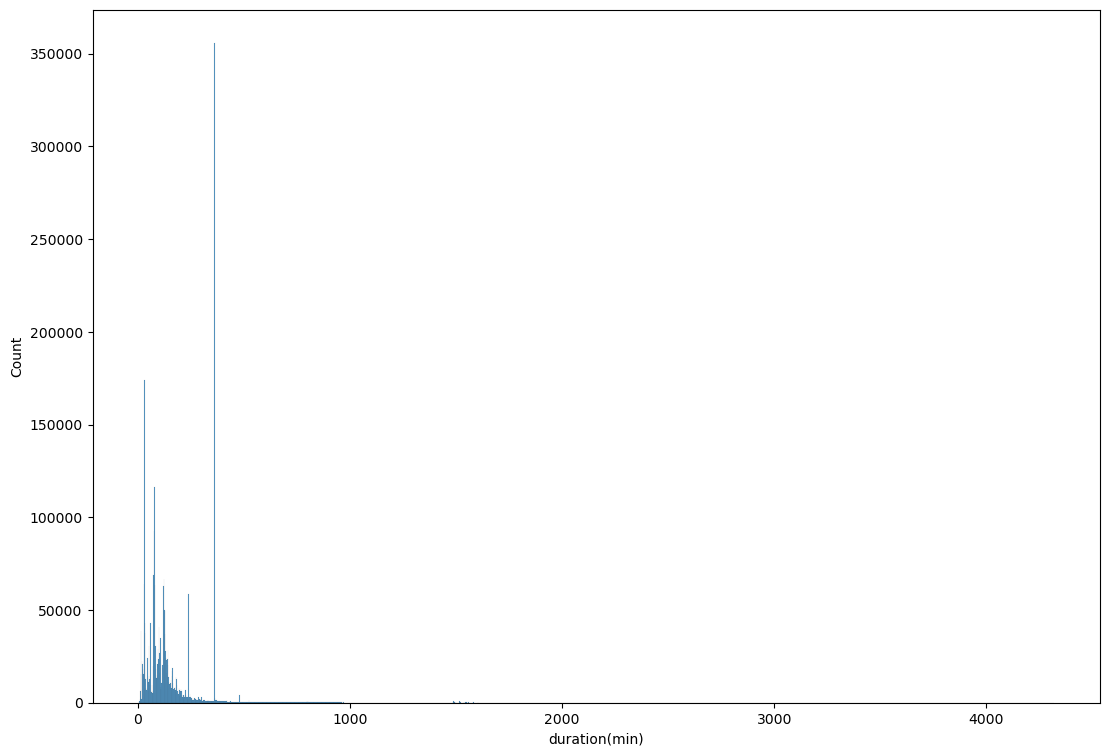

In [108]:
sns.histplot(y)

In [116]:
y.value_counts().sort_values(ascending=False).head(15)

360.000000    353058
240.000000     55394
15.000000      37038
30.000000      35345
60.000000      28845
75.000000      25794
105.000000     24615
45.000000      18568
120.000000     16625
20.000000      12938
34.966667      11343
75.016667      11186
59.000000       8269
49.966667       6229
20.500000       5763
Name: duration(min), dtype: int64

In [117]:
df.head()

,Severity,Time_of_Incident,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Junction,Stop,Traffic_Signal,Sunrise_Sunset,Zipcode,Day,Hour
0,3,2016-02-08 00:37:08,42.1,10.0,0.00,Light Rain,False,False,False,Night,43017,Monday,0
1,2,2016-02-08 05:56:20,36.9,10.0,0.02,Light Rain,False,False,False,Night,45424,Monday,5
2,2,2016-02-08 06:15:39,36.0,10.0,0.02,Overcast,True,False,False,Night,45203,Monday,6
3,2,2016-02-08 06:51:45,39.0,10.0,NaN,Overcast,False,False,False,Night,44311,Monday,6
4,3,2016-02-08 07:53:43,37.0,10.0,0.01,Light Rain,False,False,False,Day,45217,Monday,7


In [ ]:
weather_conds = df["Weather_Condition"].unique().tolist()

In [ ]:
#we should probably clump the weather conditions/narrow them
df["Weather_Condition"].value_counts().head(20)

Fair                       1105608
Mostly Cloudy               363478
Cloudy                      348125
Partly Cloudy               249692
Clear                       173603
Light Rain                  128277
Overcast                     84787
Scattered Clouds             45087
Light Snow                   43703
Fog                          41177
Haze                         36321
Rain                         31009
Fair / Windy                 15153
Heavy Rain                   11815
Smoke                         7154
Light Drizzle                 7038
Thunder in the Vicinity       6938
Cloudy / Windy                6800
T-Storm                       6544
Mostly Cloudy / Windy         6280
Name: Weather_Condition, dtype: int64

In [ ]:
df[df["Weather_Condition"] == "Fog"].describe()

,Severity,Temperature(F),Visibility(mi),Precipitation(in),Hour
count,41177.000000,40954.000000,41156.000000,37949.000000,41177.000000
mean,2.092260,49.180278,0.971636,0.001552,9.309007
std,0.407708,12.405101,0.770645,0.020841,6.513195
min,1.000000,-9.000000,0.000000,0.000000,0.000000
25%,2.000000,40.000000,0.250000,0.000000,5.000000
50%,2.000000,50.000000,1.000000,0.000000,7.000000
75%,2.000000,58.000000,2.000000,0.000000,14.000000
max,4.000000,84.200000,10.000000,2.310000,23.000000


In [ ]:
#it would probably be useful to use visibility as well as weather condition as indicators, as well as overall visibility
print(weather_conds)

['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow', 'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy', 'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain', 'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain', 'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist', 'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke', 'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow', 'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains', 'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm', 'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity', 'Fair / Windy', 'Light Rain with Thunder', 'Heavy Thunderstorms and Snow', 'Light Snow Showers', 'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation', 'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy', 'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand', 'Light Rain / Windy', 'Widespread Dust', 'Mostly Cloudy / Windy', 'Blowing Dust / Windy', 'Blowing Dust', 'Volcanic 

In [ ]:
df["Weather_Condition"].value_counts().sort_values(ascending=False).index.tolist()

['Fair',
 'Mostly Cloudy',
 'Cloudy',
 'Partly Cloudy',
 'Clear',
 'Light Rain',
 'Overcast',
 'Scattered Clouds',
 'Light Snow',
 'Fog',
 'Haze',
 'Rain',
 'Fair / Windy',
 'Heavy Rain',
 'Smoke',
 'Light Drizzle',
 'Thunder in the Vicinity',
 'Cloudy / Windy',
 'T-Storm',
 'Mostly Cloudy / Windy',
 'Thunder',
 'Light Rain with Thunder',
 'Snow',
 'Partly Cloudy / Windy',
 'Wintry Mix',
 'Heavy T-Storm',
 'Light Rain / Windy',
 'Light Snow / Windy',
 'Drizzle',
 'Heavy Snow',
 'Rain / Windy',
 'Light Thunderstorms and Rain',
 'N/A Precipitation',
 'Patches of Fog',
 'Mist',
 'Thunderstorm',
 'Shallow Fog',
 'Light Freezing Rain',
 'Heavy Rain / Windy',
 'Showers in the Vicinity',
 'Haze / Windy',
 'Heavy Thunderstorms and Rain',
 'Thunderstorms and Rain',
 'Snow / Windy',
 'Light Freezing Fog',
 'Heavy T-Storm / Windy',
 'Light Freezing Drizzle',
 'Fog / Windy',
 'T-Storm / Windy',
 'Thunder / Windy',
 'Heavy Snow / Windy',
 'Blowing Snow',
 'Blowing Dust / Windy',
 'Blowing Dust',
 '

In [ ]:
#we probably aren't losing much data by just dropping the vals that make up a small percentage of the samples, but some should be included

In [293]:
def narrow_weather(row):
    #define keywords to categorize by
    keywords = {
        "rain" : "rain",
        "storm" : "storm",
        "drizzle" : "rain",
        "snow" : "snow",
        "sleet" : "snow",
        "fair" : "fair",
        "clear" : "fair",
        "windy" : "windy",
        "fog" : "fog",
        "haze" : "fog",
        "hail" : "hail",
        "thunder" : "storm",
        "overcast" : "cloudy",
        "cloud" : "cloudy",
        "wintry" : "snow",
        "drizzle" : "rain",
        "mist" : "fog",
        "smoke" : "smoke",
        "shower" : "rain",
        "precipitation" : "rain",
        "dust" : "dust",
        "ice" : "hail",
        "sand" : "dust",
        "squall" : "storm",
    }
    
    entry = np.nan
    for k, v in keywords.items():
        if k in row["Weather_Condition"].lower():
            entry = v

    return entry


In [294]:
df.dropna(subset=["Weather_Condition"]).shape[0] / df.shape[0]

0.9751873766425372

In [295]:
#drop weather nans
df.dropna(subset=["Weather_Condition"], inplace=True)
df["weather"] = df.apply(lambda row: narrow_weather(row), axis=1)

In [296]:
df["weather"].value_counts().sum() / df.shape[0]

0.9999953082734988

In [297]:
df[df["weather"].isna()]["Weather_Condition"].value_counts()

Tornado         9
Volcanic Ash    4
Name: Weather_Condition, dtype: int64

In [298]:
df.isnull().mean() * 100

Severity              0.000000
Time_of_Incident      0.000000
Temperature(F)        0.411284
Visibility(mi)        0.261293
Precipitation(in)    17.713794
Weather_Condition     0.000000
Junction              0.000000
Stop                  0.000000
Traffic_Signal        0.000000
Sunrise_Sunset        0.080950
Zipcode               0.000000
duration(min)         0.000000
Day                   0.000000
Hour                  0.000000
weather               0.000469
dtype: float64

In [299]:
df[df["Precipitation(in)"].isna()]["weather"].value_counts()

cloudy    248753
fair      217654
fog        11168
rain        7612
snow        2595
storm       1210
smoke       1167
windy        594
dust          48
hail          15
Name: weather, dtype: int64

In [300]:
#replace N/A precipitation with 0, since most are for clear/overcast weather
#there is potential that precipitation is 0 but also wet/snowy conditions, 
#so will not drop those values unless it clearly poorly affects model later.
df["Precipitation(in)"].fillna(value=0.0, inplace=True)

In [301]:
assert df[df["Precipitation(in)"].isna()]["weather"].value_counts().shape[0] == 0 

In [302]:
df.isnull().mean() * 100

Severity             0.000000
Time_of_Incident     0.000000
Temperature(F)       0.411284
Visibility(mi)       0.261293
Precipitation(in)    0.000000
Weather_Condition    0.000000
Junction             0.000000
Stop                 0.000000
Traffic_Signal       0.000000
Sunrise_Sunset       0.080950
Zipcode              0.000000
duration(min)        0.000000
Day                  0.000000
Hour                 0.000000
weather              0.000469
dtype: float64

In [303]:
#dropping where temp, weather & visibility are null.
df = df.dropna(subset=["Visibility(mi)", "Temperature(F)", "weather"])

In [304]:
df.isnull().mean() * 100

Severity             0.000000
Time_of_Incident     0.000000
Temperature(F)       0.000000
Visibility(mi)       0.000000
Precipitation(in)    0.000000
Weather_Condition    0.000000
Junction             0.000000
Stop                 0.000000
Traffic_Signal       0.000000
Sunrise_Sunset       0.080575
Zipcode              0.000000
duration(min)        0.000000
Day                  0.000000
Hour                 0.000000
weather              0.000000
dtype: float64

In [305]:
#checking sunrise sunset hour values, out of curiosity
df[df["Sunrise_Sunset"].isnull()]["Hour"].value_counts()
#no real distribution, lines up with common driving hours. dropping
df = df.dropna(subset=["Sunrise_Sunset"])

In [306]:
df.isnull().mean() * 100

Severity             0.0
Time_of_Incident     0.0
Temperature(F)       0.0
Visibility(mi)       0.0
Precipitation(in)    0.0
Weather_Condition    0.0
Junction             0.0
Stop                 0.0
Traffic_Signal       0.0
Sunrise_Sunset       0.0
Zipcode              0.0
duration(min)        0.0
Day                  0.0
Hour                 0.0
weather              0.0
dtype: float64

In [ ]:
#need to drop some duration vals, there are clear spikes at most hour marks

<AxesSubplot: ylabel='Frequency'>

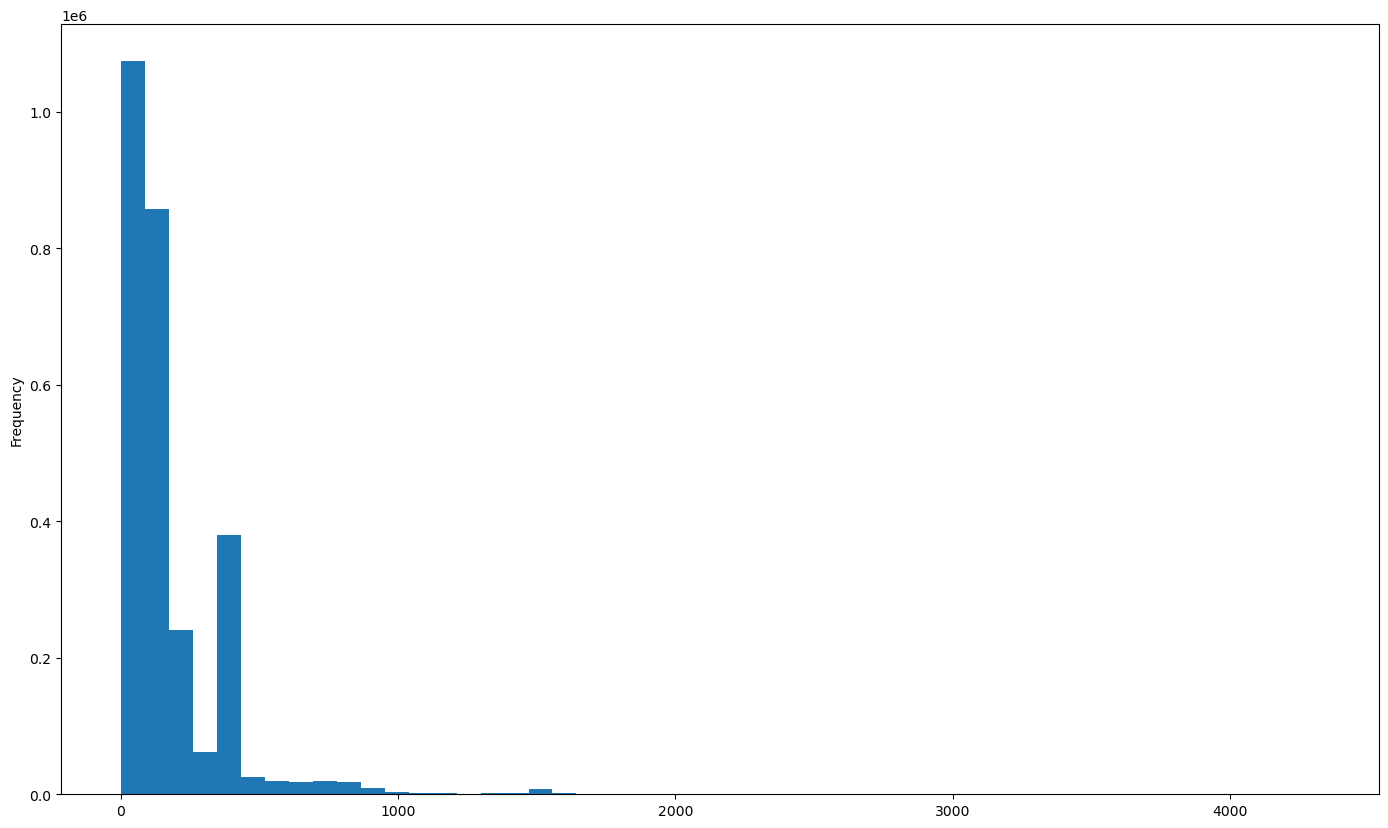

In [312]:
df["duration(min)"].plot(kind="hist",bins=50)

In [308]:
df["duration(min)"].value_counts()

In [228]:
#our data is clean, and we have a good weather column!
#create X df that drops the dataframes we no longer want
cols = ["Severity", "Temperature(F)", "Visibility(mi)", "Precipitation(in)", "Junction", "Stop", "Traffic_Signal", "Sunrise_Sunset", "Day", "Hour", "weather"]

X = df[cols]

In [229]:
X.head(5)

,Severity,Temperature(F),Visibility(mi),Precipitation(in),Junction,Stop,Traffic_Signal,Sunrise_Sunset,Day,Hour,weather
0,3,42.1,10.0,0.00,False,False,False,Night,Monday,0,rain
1,2,36.9,10.0,0.02,False,False,False,Night,Monday,5,rain
2,2,36.0,10.0,0.02,True,False,False,Night,Monday,6,cloudy
3,2,39.0,10.0,0.00,False,False,False,Night,Monday,6,cloudy
4,3,37.0,10.0,0.01,False,False,False,Day,Monday,7,rain


In [230]:
#import ML packages
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor